# **DSA210 TERM PROJECT**

# Import necessary libraries and pull the data of the first dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "dataset.csv"
df = pd.read_csv(file_path)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

In [23]:
df.describe()

,AGE
count,3000.000000
mean,55.169000
std,14.723746
min,30.000000
25%,42.000000
50%,55.000000
75%,68.000000
max,80.000000


Changing the number 1s and 2s into No's and Yes's, M to Male and F to Female for better visualization.

In [3]:
binary_columns = [
    "SMOKING", "YELLOW_FINGERS", "PEER_PRESSURE", "CHRONIC_DISEASE",
    "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "ANXIETY",
    "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"
]

# Map 1 -> 'No', 2 -> 'Yes'
df[binary_columns] = df[binary_columns].replace({1: "No", 2: "Yes"})
df["GENDER"] = df["GENDER"].replace({"M": "Male", "F": "Female"})

Total distribution of cancer patients and healthy patients.

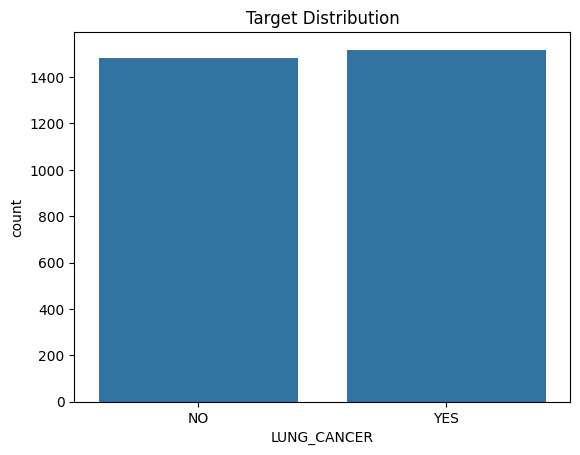

In [4]:
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

Plotting the most common assumptions for the causes of Lung Cancers.

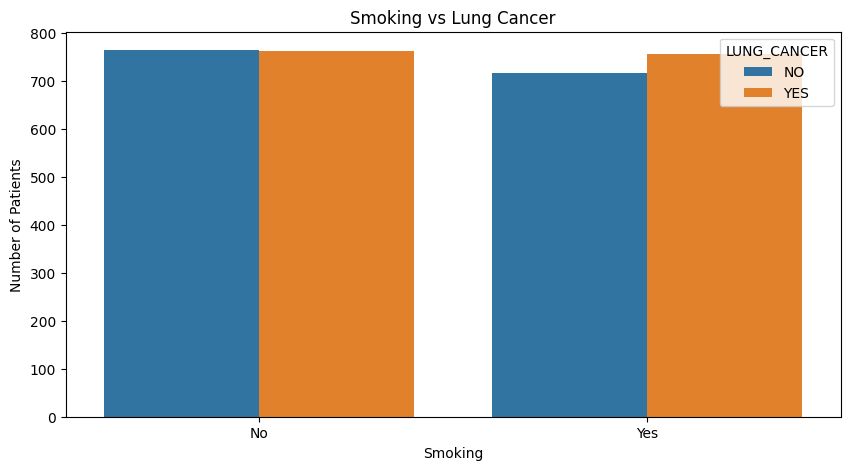

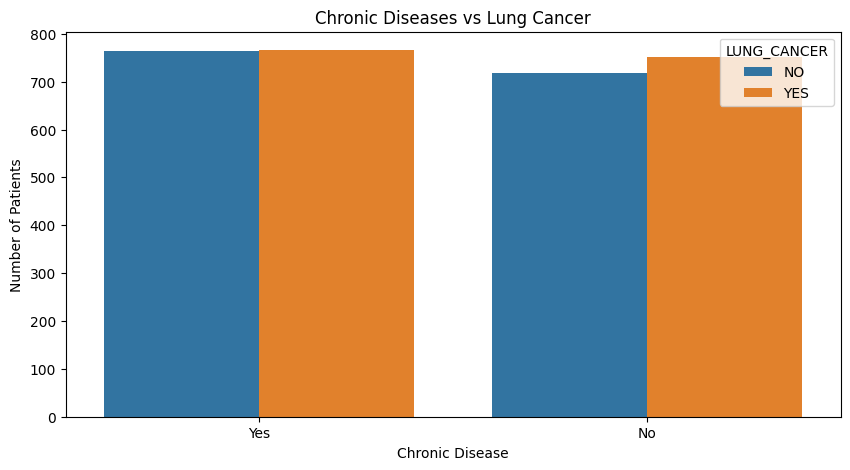

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(x="SMOKING", hue="LUNG_CANCER", data=df)
plt.title("Smoking vs Lung Cancer")
plt.xlabel("Smoking")
plt.ylabel("Number of Patients")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x="CHRONIC_DISEASE", hue="LUNG_CANCER", data=df)
plt.title("Chronic Diseases vs Lung Cancer")
plt.xlabel("Chronic Disease")
plt.ylabel("Number of Patients")
plt.show()


Age distributions of patients for Lung Cancer and Smoking

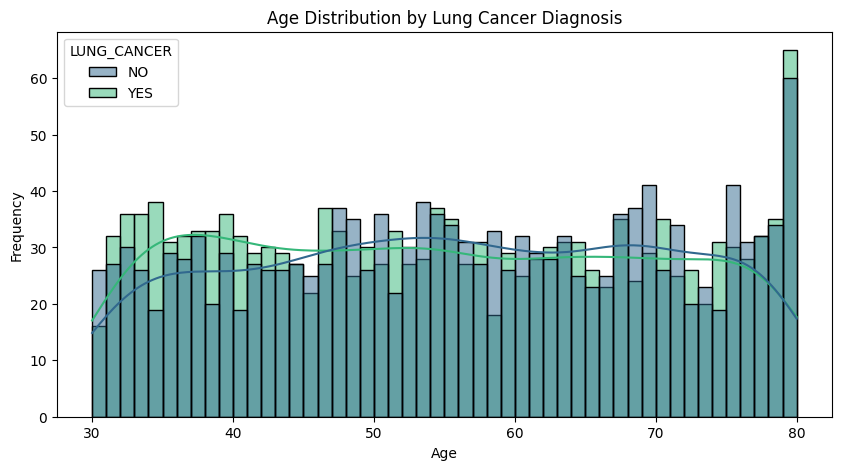

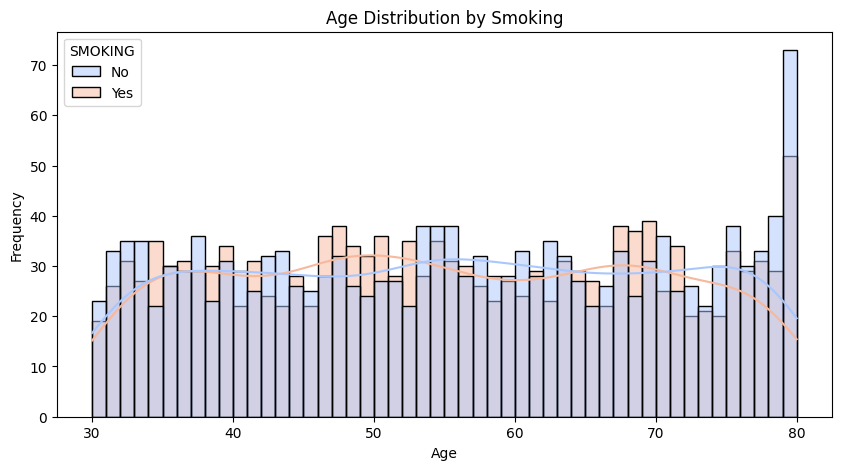

Mean Age: 55.169
Median Age: 55.0
Mode Age: 54


In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="AGE", hue="LUNG_CANCER", kde=True, bins=50, palette="viridis")
plt.title("Age Distribution by Lung Cancer Diagnosis")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="AGE", hue="SMOKING", kde=True, bins=50, palette="coolwarm")
plt.title("Age Distribution by Smoking")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

mean_age = df['AGE'].mean()
median_age = df['AGE'].median()
mode_age = df['AGE'].mode()[0]

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

Male/Female Ratio

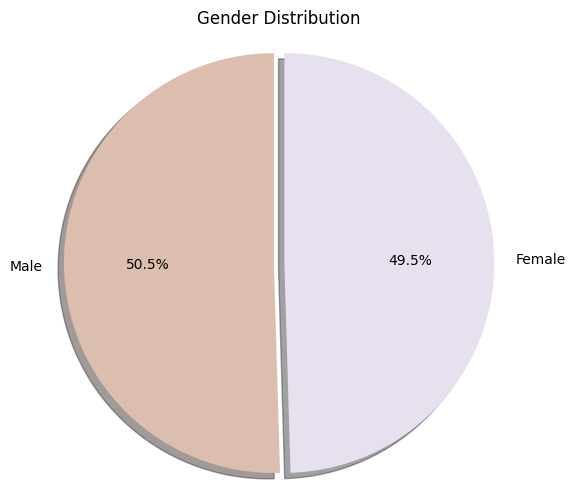

In [7]:
df["GENDER"] = df["GENDER"].replace({"M": "Male", "F": "Female"})

gender_counts = df["GENDER"].value_counts()

colors = ["#dcbeaf", "#e7e0ee"]
explode = (0.05, 0)

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

Some Columns of Possible Causes vs Age Using Violin Graphs

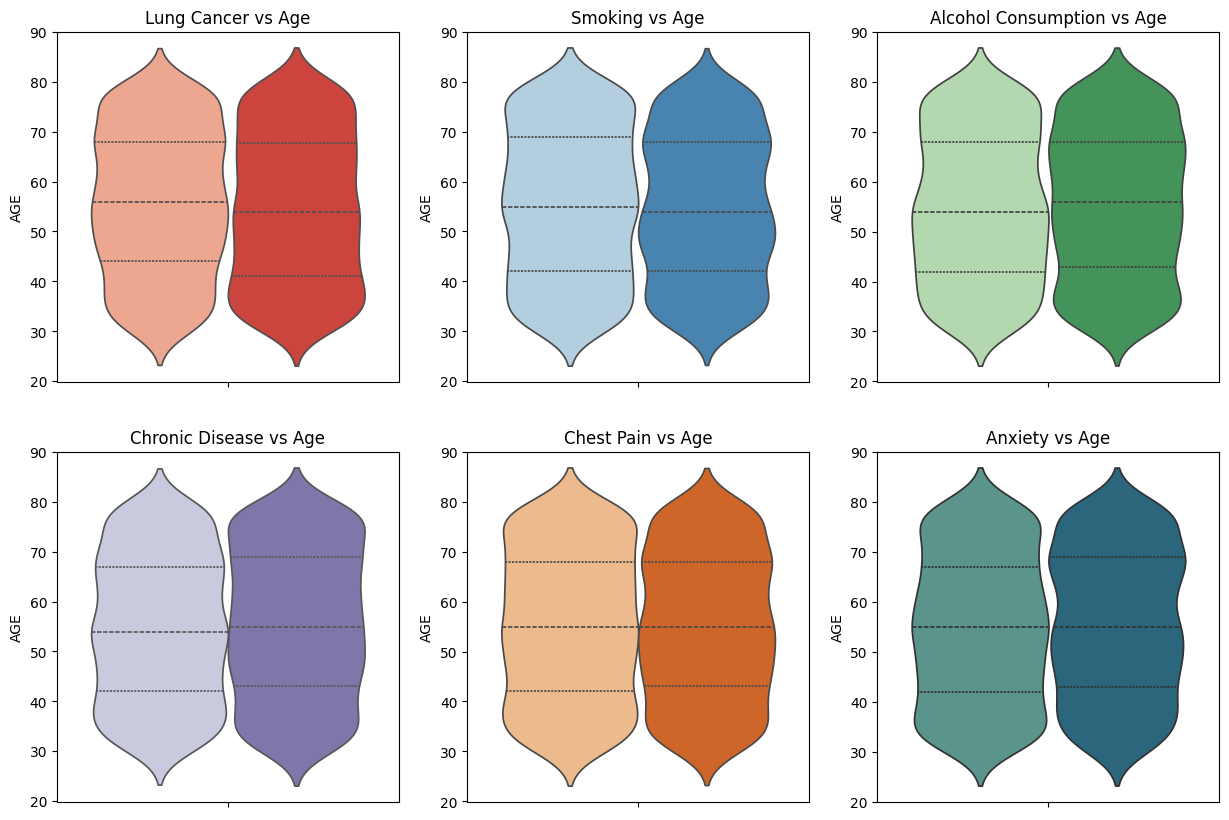

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.violinplot(hue="LUNG_CANCER", y="AGE", data=df, inner="quartile", ax=axes[0][0], palette="Reds", legend=False)
axes[0][0].set_title("Lung Cancer vs Age")

sns.violinplot(hue="SMOKING", y="AGE", data=df, inner="quartile", ax=axes[0][1], palette="Blues", legend=False)
axes[0][1].set_title("Smoking vs Age")

sns.violinplot(hue="ALCOHOL_CONSUMING", y="AGE", data=df, inner="quartile", ax=axes[0][2], palette="Greens", legend=False)
axes[0][2].set_title("Alcohol Consumption vs Age")

sns.violinplot(hue="CHRONIC_DISEASE", y="AGE", data=df, inner="quartile", ax=axes[1][0], palette="Purples", legend=False)
axes[1][0].set_title("Chronic Disease vs Age")

sns.violinplot(hue="CHEST_PAIN", y="AGE", data=df, inner="quartile", ax=axes[1][1], palette="Oranges", legend=False)
axes[1][1].set_title("Chest Pain vs Age")

sns.violinplot(hue="ANXIETY", y="AGE", data=df, inner="quartile", ax=axes[1][2], palette="crest", legend=False)
axes[1][2].set_title("Anxiety vs Age")

plt.show()

All Columns vs Lung Cancer

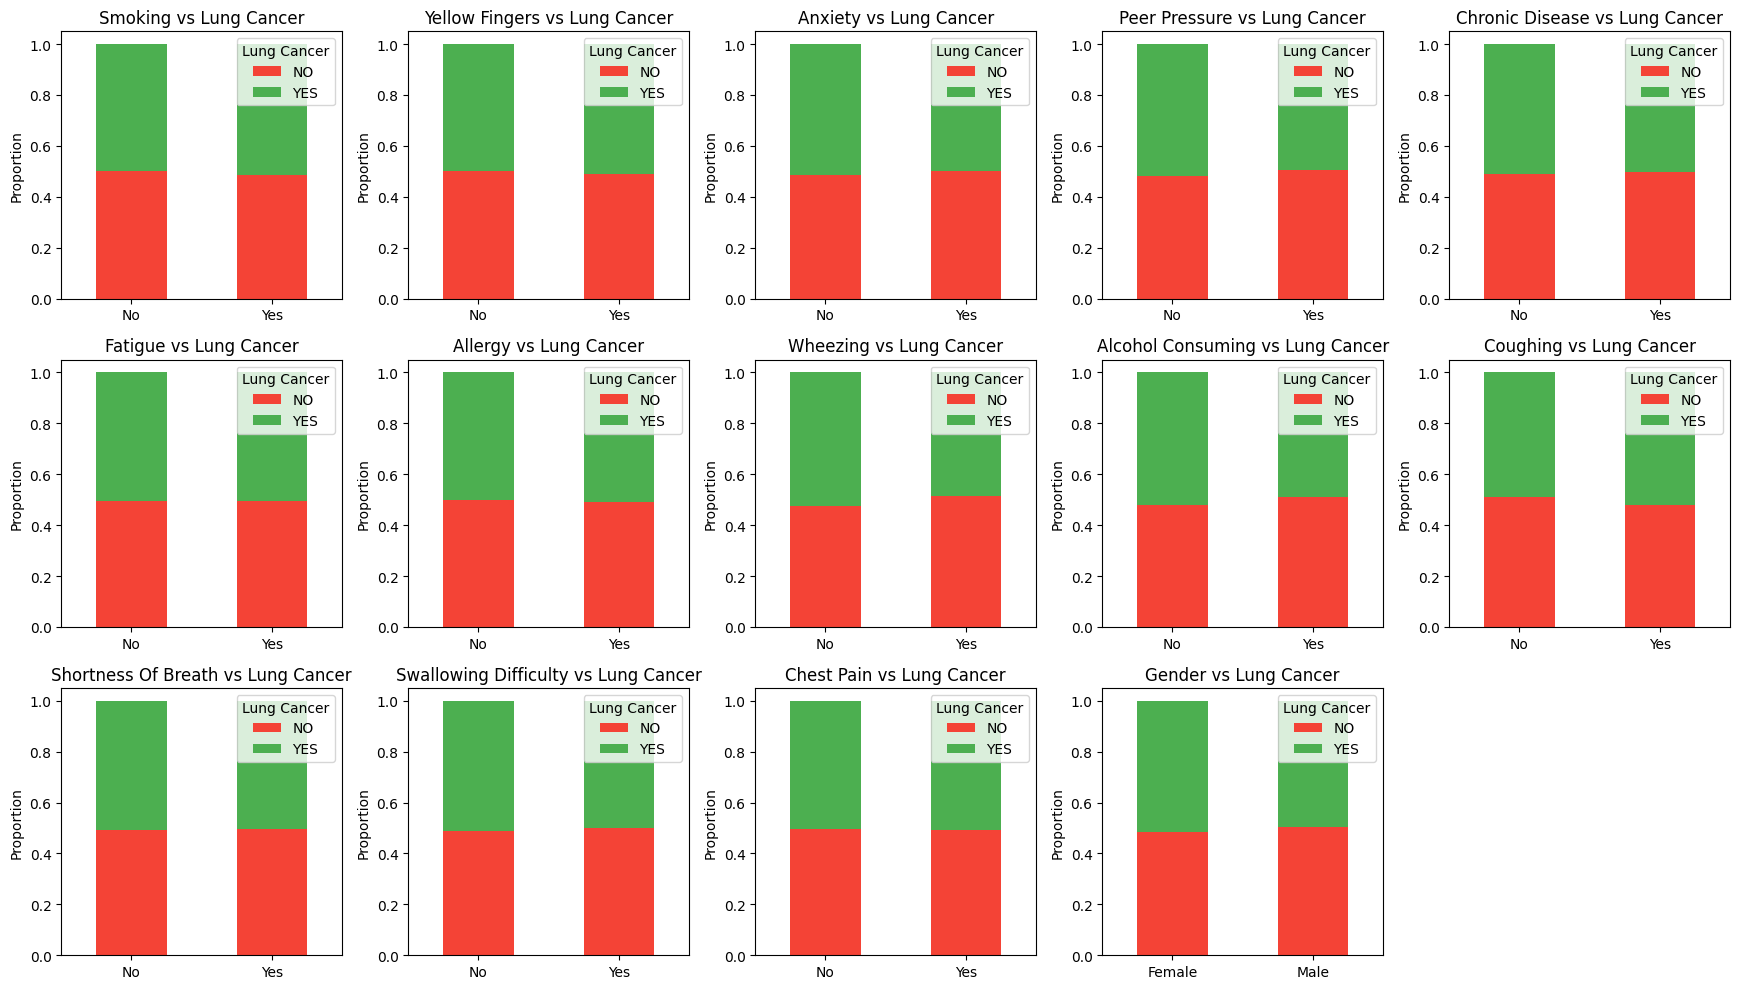

In [9]:
features = [
    "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC_DISEASE",
    "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "COUGHING",
    "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN", "GENDER", "AGE"
]

fig, axes = plt.subplots(3, 5, figsize=(17.5, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    if feature == "AGE":
        axes[i].axis('off')
        continue
    crosstab = pd.crosstab(df[feature], df["LUNG_CANCER"], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=["#F44336", "#4CAF50"])

    axes[i].set_title(f"{feature.replace('_', ' ').title()} vs Lung Cancer")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel("")
    axes[i].legend(title="Lung Cancer", loc='upper right')

    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Correlation Matrix of Lung Cancer Dataset 1

<ipython-input-34-2b6badfde520>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded[yes_no_columns] = df_encoded[yes_no_columns].applymap(yes_no_map.get)


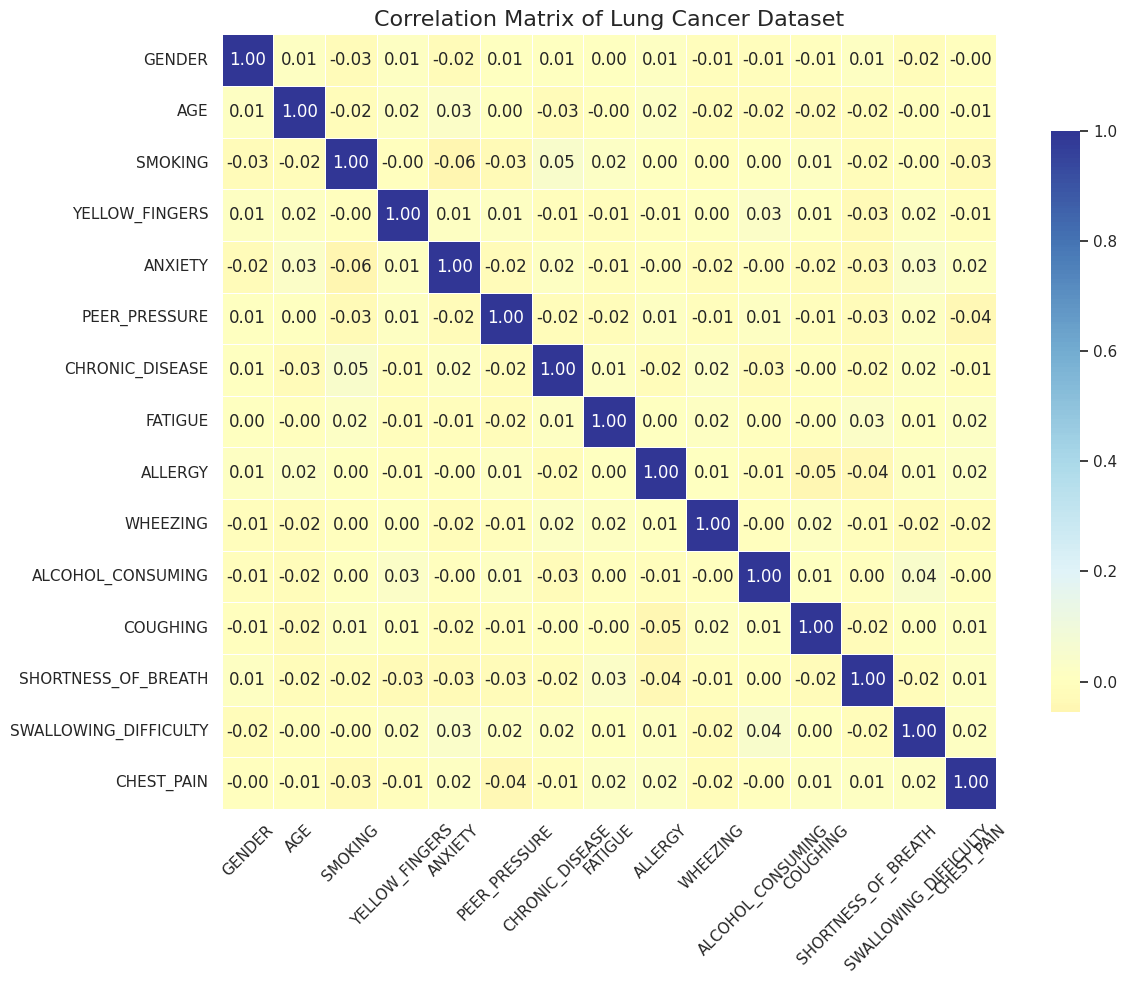

In [34]:
df_encoded = df.copy()
yes_no_map = {"Yes": 1, "No": 0}
gender_map = {"Male": 1, "Female": 0}

yes_no_columns = [
    "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE",
    "CHRONIC_DISEASE", "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING",
    "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN", "LUNG_CANCER"
]

df_encoded[yes_no_columns] = df_encoded[yes_no_columns].applymap(yes_no_map.get)
df_encoded["GENDER"] = df_encoded["GENDER"].map(gender_map)

df_numeric = df_encoded.select_dtypes(include=["number"])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix of Lung Cancer Dataset", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Pulling the data from the second dataset and visualizing it

In [11]:
file_path2 = "dataset2.csv"
df2 = pd.read_csv(file_path2)
df2.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Removing the index and Patient Id columns

In [12]:
df2 = df2.iloc[:, 2:]

In [13]:
df2.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [18]:
df2.iloc[:, 0:11].describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000


In [19]:
df2.iloc[:, 12:].describe()

,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [21]:
df2.shape

(1000, 24)

Preparing the second dataset for visualization

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
df2['Gender'] = df2['Gender'].map({1: 'Male', 2: 'Female'})
df2['Level'] = df2['Level'].astype("category")

<Figure size 1000x600 with 0 Axes>

Plotting the age distribution of the patients

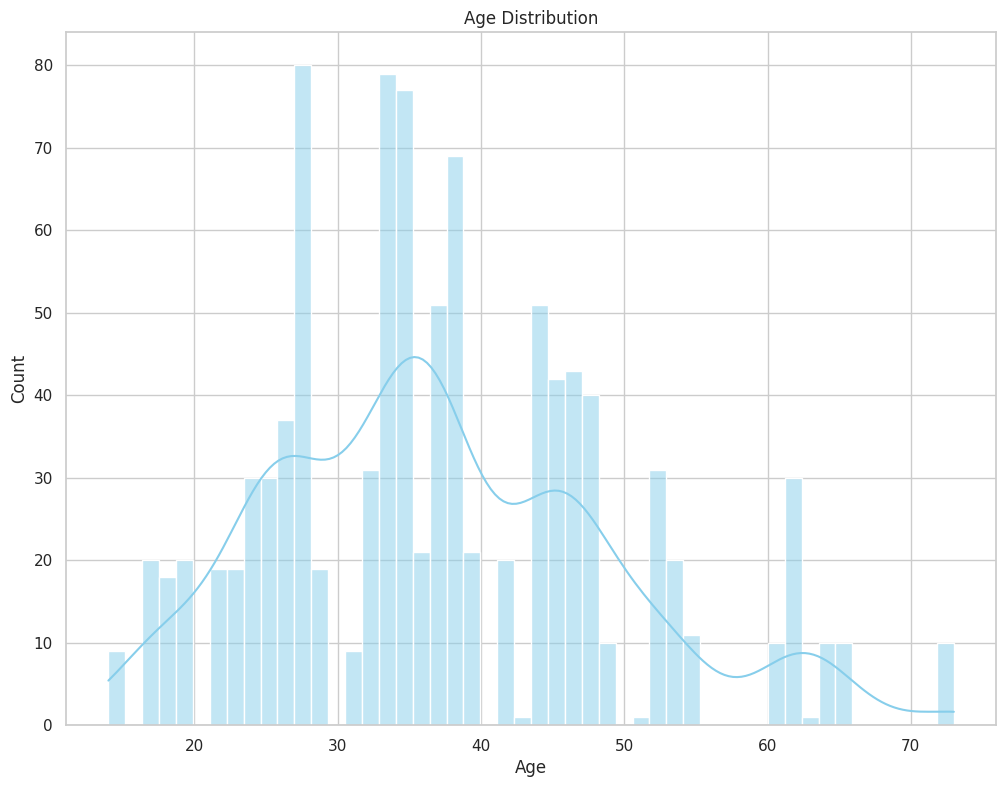

In [29]:
plt.figure(figsize=(12, 9))
sns.histplot(df2['Age'], bins=50, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Plotting the gender distributions of the patients

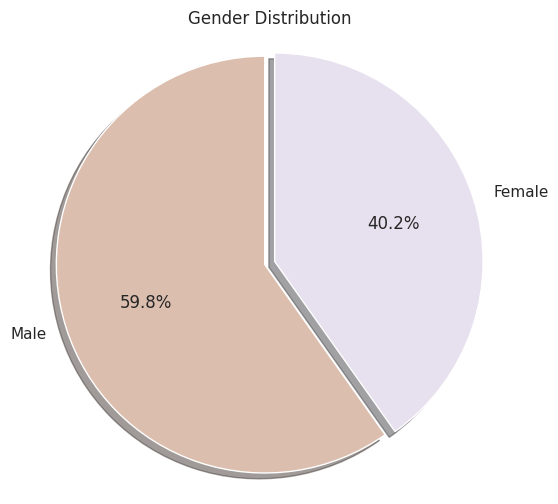

In [31]:
gender_counts = df2["Gender"].value_counts()

colors = ["#dcbeaf", "#e7e0ee"]
explode = (0.05, 0)

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

Plotting the risks of Lung Cancer of the patients

<ipython-input-33-80d4d314cecc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Level', palette='Set2')


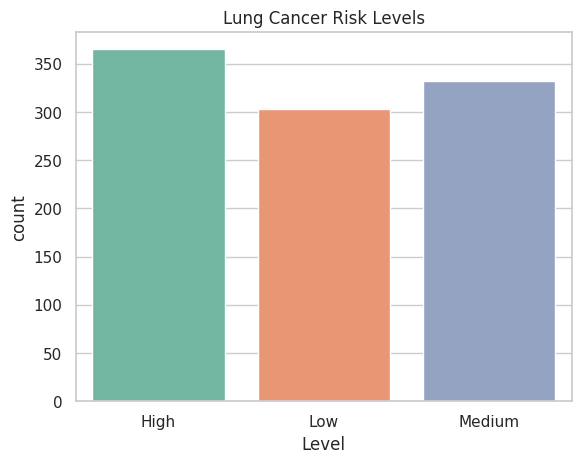

In [33]:
sns.countplot(data=df2, x='Level', palette='Set2')
plt.title('Lung Cancer Risk Levels')
plt.show();

Age vs Lung Cancer Boxplot

<ipython-input-40-0c042321597f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='Level', y='Age', palette='coolwarm')


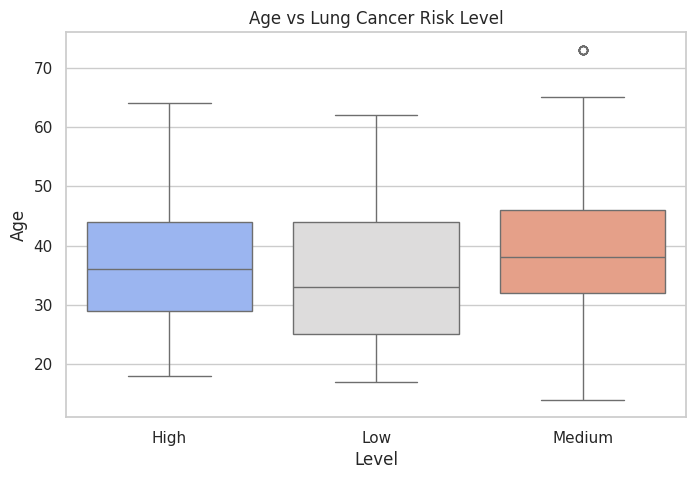

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x='Level', y='Age', palette='coolwarm')
plt.title('Age vs Lung Cancer Risk Level')
plt.show()

Pairplot of the selected columns

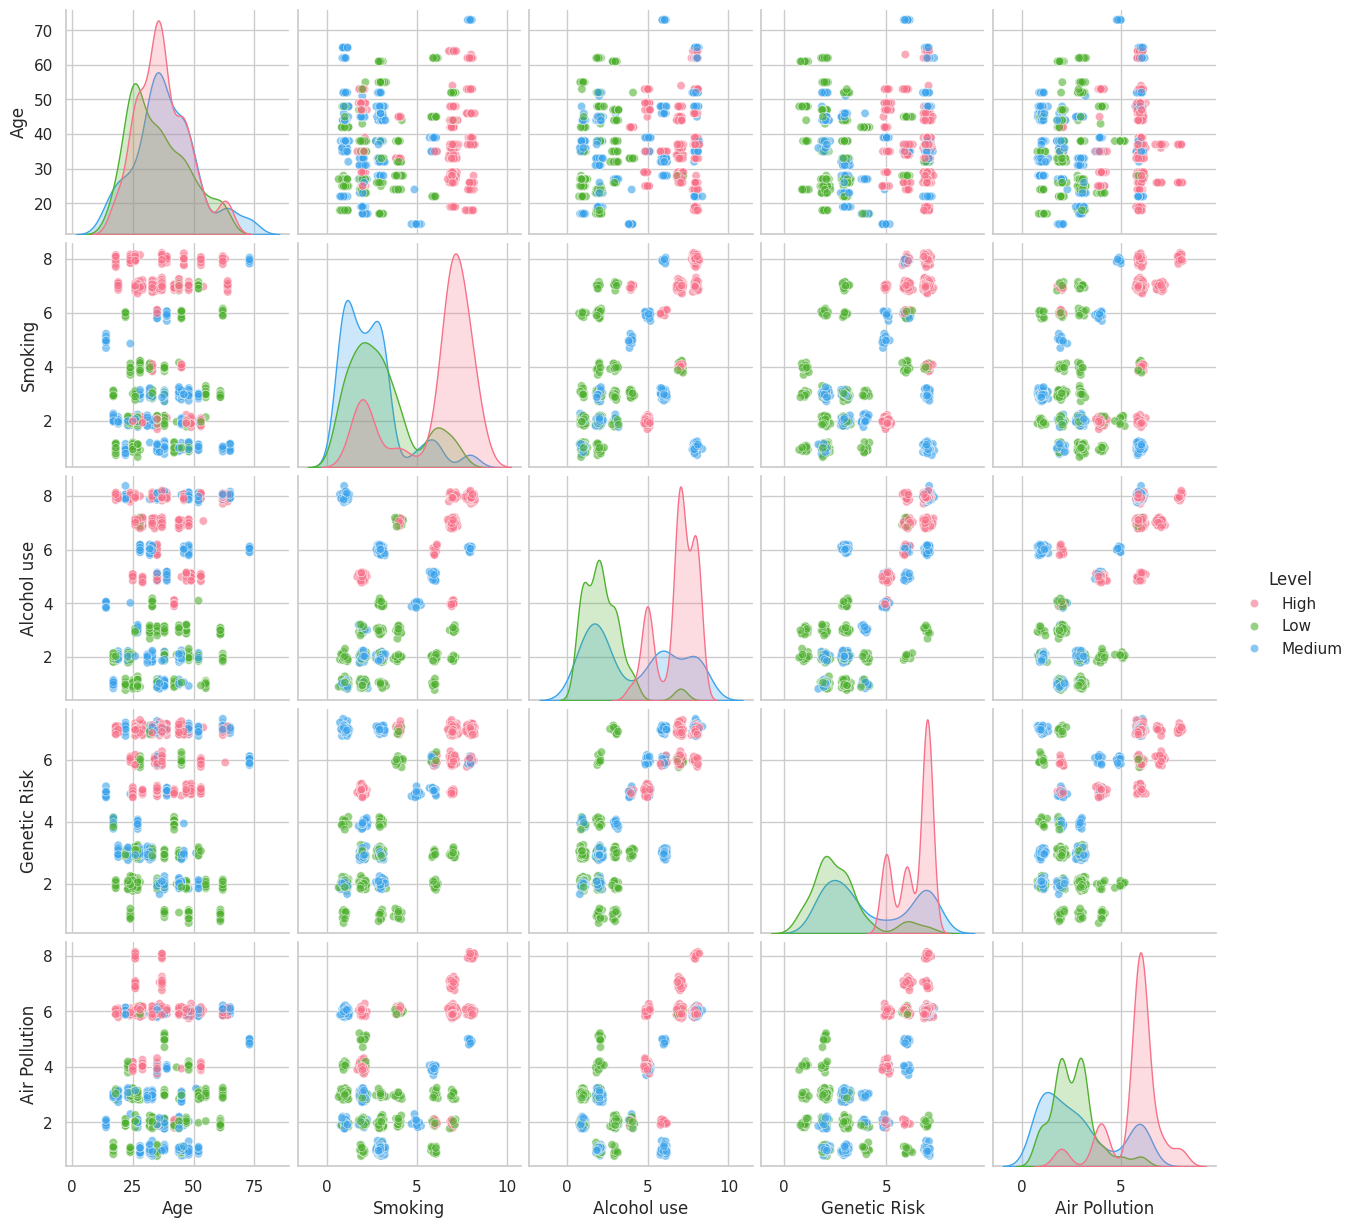

In [37]:
selected = ['Age', 'Smoking', 'Alcohol use', 'Genetic Risk', 'Air Pollution', 'Level']
df_jittered = df2.copy()
jitter_cols = ['Smoking', 'Alcohol use', 'Genetic Risk', 'Air Pollution']

for col in jitter_cols:
    df_jittered[col] = df_jittered[col] + np.random.normal(0, 0.1, size=len(df2))

sns.pairplot(df_jittered[selected], hue='Level', palette='husl', plot_kws={'alpha': 0.6})

Correlation between the columns

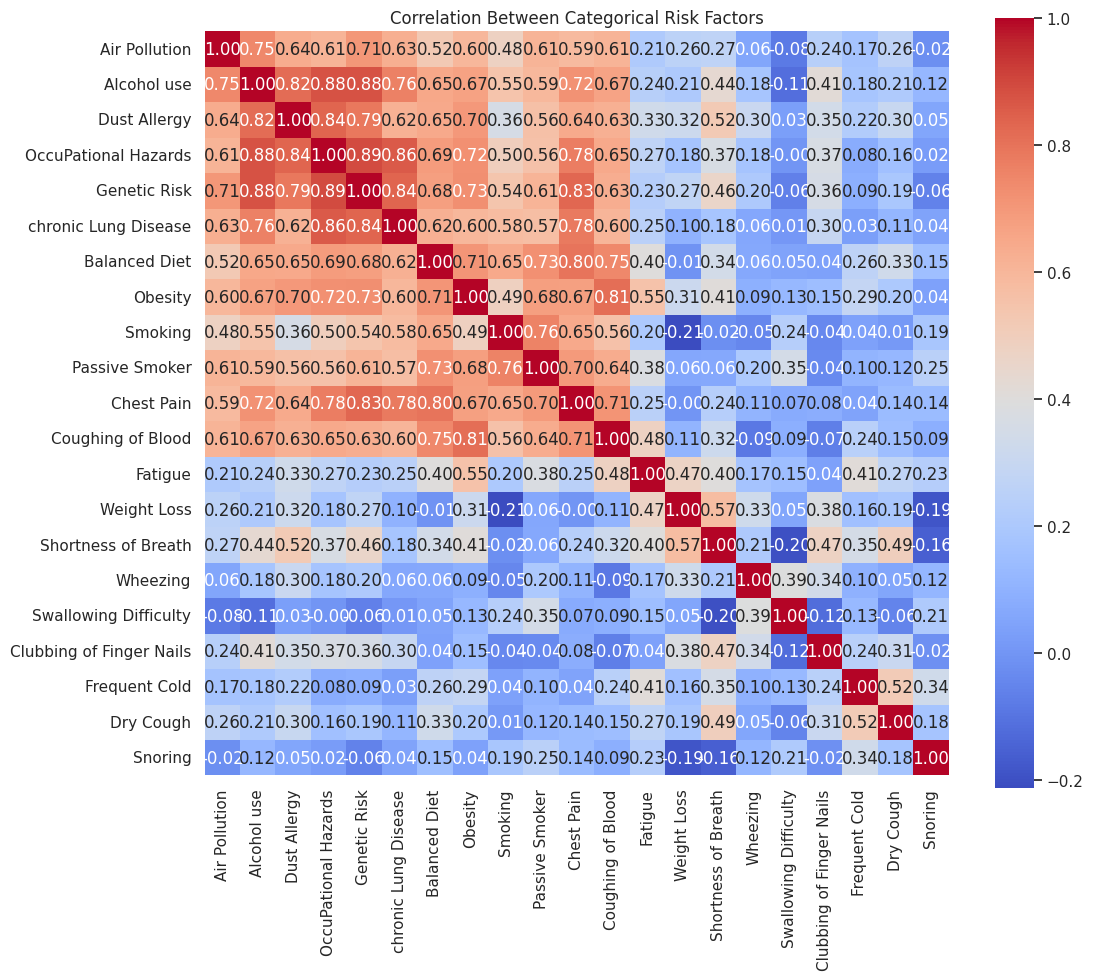

In [41]:
categorical_cols = df2.drop(columns=['Age', 'Gender', 'Level']).columns
plt.figure(figsize=(12, 10))
corr_matrix = df2[categorical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between Categorical Risk Factors")
plt.show()